# Modelo 1. Con GrLivArea

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("../dataset/train.csv")

# Seleccionar solo las columnas necesarias
df = df[['GrLivArea', 'SalePrice']].dropna()  # Asegurar que no haya valores nulos

# Separar en variables predictora y objetivo
X = df[['GrLivArea']]  # Variable predictora
y = df['SalePrice']     # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes del modelo
intercept = model.intercept_
slope = model.coef_[0]

print(f" Modelo entrenado: SalePrice = {intercept:.2f} + {slope:.2f} * GrLivArea")

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Análisis de residuos
residuos1 = y_test - y_pred

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())



 Modelo entrenado: SalePrice = 24899.75 + 102.49 * GrLivArea
Cross-validation scores: [0.44074013 0.61569612 0.61235621 0.42544795 0.55171762]
Mean score: 0.5291916072217437


In [126]:
#probar tambien con train, deberia ser parecido a lo otro con test
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.57977843 0.38355361 0.43728144 0.42940741 0.55191913]
Mean score: 0.47638800229591877


{'whiskers': [<matplotlib.lines.Line2D at 0x27acb6de0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27aca969810>,
 'boxes': [<matplotlib.lines.Line2D at 0x27acb6de350>],
 'medians': [<matplotlib.lines.Line2D at 0x27aca969a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27aca969bd0>],
 'means': []}

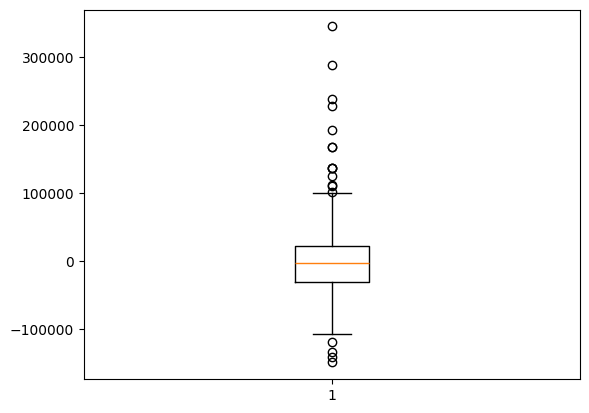

In [127]:
plt.boxplot(residuos1)

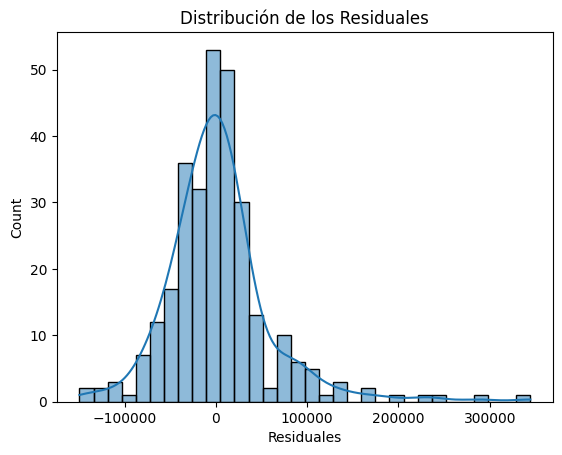

In [128]:
sns.histplot(residuos1, kde=True)  # kde=True para incluir la curva de densidad
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Modelo 2 con Todas las variables numericas

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("../dataset/train.csv")

# Seleccionar solo variables numéricas y eliminar valores nulos
df_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

# Separar variables predictoras y variable objetivo
X = df_numeric.drop(columns=['SalePrice'])  # Variables predictoras
y = df_numeric['SalePrice']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Guardar evaluación en un diccionario
model_evaluation = {
    "MAE (Error Absoluto Medio)": mae,
    "MSE (Error Cuadrático Medio)": mse,
    "RMSE (Raíz del Error Cuadrático Medio)": rmse,
    "R² (Coeficiente de Determinación)": r2
}

# Mostrar evaluación del modelo
print("Evaluación del Modelo Multivariado:")
for key, value in model_evaluation.items():
    print(f"{key}: {value:.2f}")

# Obtener coeficientes del modelo
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_})
coefficients = coefficients.sort_values(by="Coeficiente", ascending=False)

# Análisis de residuos
residuos2 = y_test - y_pred

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())



Evaluación del Modelo Multivariado:
MAE (Error Absoluto Medio): 23643.51
MSE (Error Cuadrático Medio): 1591724600.58
RMSE (Raíz del Error Cuadrático Medio): 39896.42
R² (Coeficiente de Determinación): 0.80
Cross-validation scores: [0.78242347 0.83880591 0.72041054 0.85358611 0.76836967]
Mean score: 0.7927191427296465


In [130]:
#probar tambien con train, deberia ser parecido a lo otro con test
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.85805689 0.75658732 0.73213822 0.79220399 0.37715552]
Mean score: 0.7032283871406289


{'whiskers': [<matplotlib.lines.Line2D at 0x27ac4cf7890>,
 'caps': [<matplotlib.lines.Line2D at 0x27ac4cf7b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ac4cf7750>],
 'medians': [<matplotlib.lines.Line2D at 0x27ac4cf7d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ac4cf7ed0>],
 'means': []}

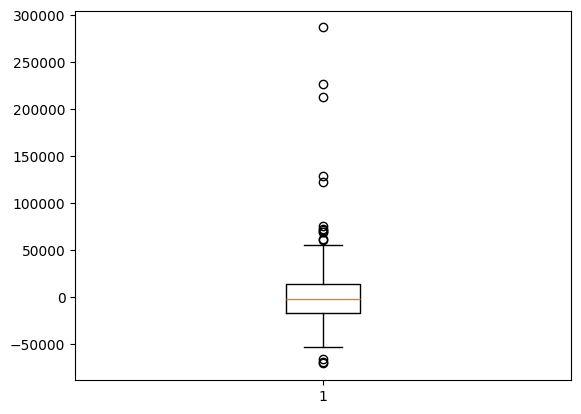

In [131]:
plt.boxplot(residuos2)

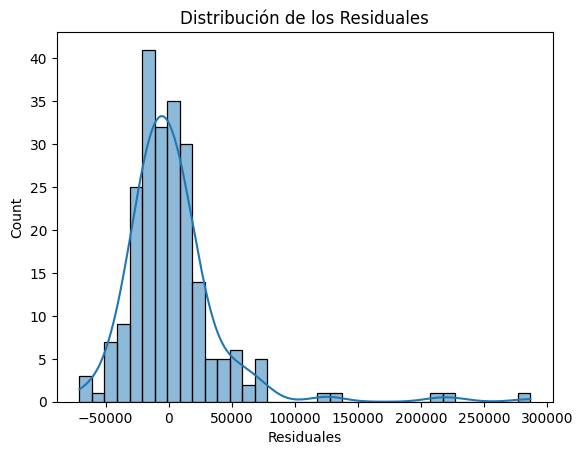

In [132]:
sns.histplot(residuos2, kde=True)  # kde=True para incluir la curva de densidad
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Modelo 3. Final, corregido

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Cargar el dataset
df = pd.read_csv("../dataset/train.csv")

# Seleccionar solo variables numéricas y eliminar valores nulos
df_numeric = df.select_dtypes(include=['int64', 'float64']).dropna()

# Separar variables predictoras y variable objetivo
X = df_numeric.drop(columns=['SalePrice'])  # Variables predictoras
y = df_numeric['SalePrice']  # Variable objetivo

# Calcular el VIF para detectar multicolinealidad
def calcular_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

vif_df = calcular_vif(X)

# Filtrar variables con VIF aceptable (VIF < 10)
variables_filtradas = vif_df[vif_df["VIF"] < 10]["Variable"].tolist()
X_filtrado = X[variables_filtradas]

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el nuevo modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

# Análisis de residuos
residuos3 = y_test - y_pred


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.56515789 0.5425858  0.29463676 0.50815905 0.4974122 ]
Mean score: 0.48159034049914357


In [147]:
#probar tambien con train, deberia ser parecido a lo otro con test
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.51093038 0.47204317 0.32562056 0.4775044  0.13886642]
Mean score: 0.3849929869953275


{'whiskers': [<matplotlib.lines.Line2D at 0x27ace3c8cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ace3c8b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ace3c8f50>],
 'medians': [<matplotlib.lines.Line2D at 0x27ace3fc410>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ace3fc550>],
 'means': []}

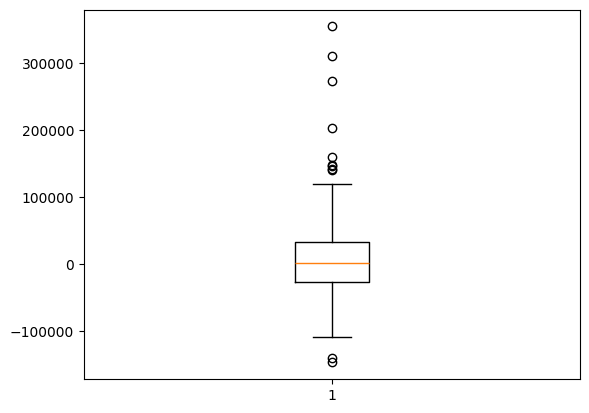

In [148]:
plt.boxplot(residuos3)

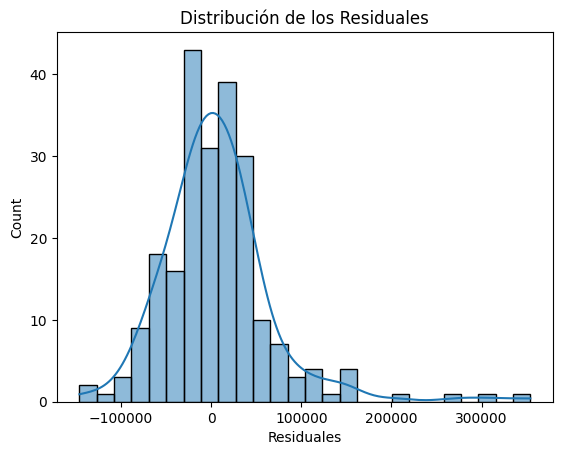

In [149]:
sns.histplot(residuos3, kde=True)  # kde=True para incluir la curva de densidad
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")
plt.show()

# Analisis

<Figure size 1000x600 with 0 Axes>

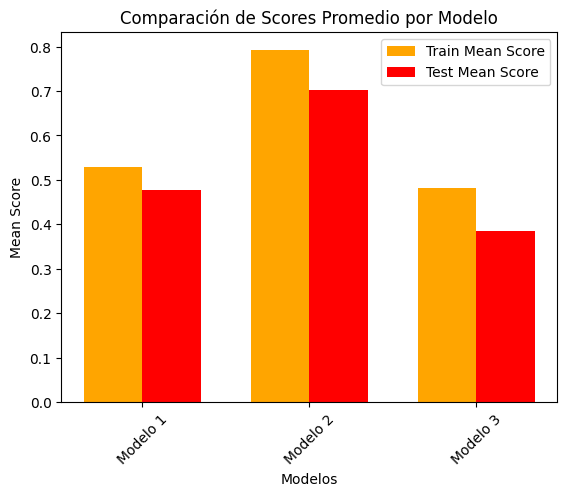

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de validación cruzada de cada modelo (train y test)
model_scores = {
    "Modelo 1": {
        "Train Scores": [0.4407, 0.6157, 0.6124, 0.4254, 0.5517],
        "Test Scores": [0.5798, 0.3836, 0.4373, 0.4294, 0.5519],
    },
    "Modelo 2": {
        "Train Scores": [0.7824, 0.8388, 0.7204, 0.8536, 0.7684],
        "Test Scores": [0.8581, 0.7566, 0.7321, 0.7922, 0.3772],
    },
    "Modelo 3": {
        "Train Scores": [0.56515789, 0.5425858,  0.29463676, 0.50815905, 0.4974122],
        "Test Scores": [0.51093038, 0.47204317, 0.32562056, 0.4775044,  0.13886642],
    },
}
# Calcular la media de cada conjunto
train_means = {model: np.mean(scores["Train Scores"]) for model, scores in model_scores.items()}
test_means = {model: np.mean(scores["Test Scores"]) for model, scores in model_scores.items()}

# Crear la gráfica
plt.figure(figsize=(10, 6))
x = np.arange(len(model_scores))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_means.values(), width, label='Train Mean Score', color='orange')
rects2 = ax.bar(x + width/2, test_means.values(), width, label='Test Mean Score', color='red')

ax.set_xlabel("Modelos")
ax.set_ylabel("Mean Score")
ax.set_title("Comparación de Scores Promedio por Modelo")
ax.set_xticks(x)
ax.set_xticklabels(train_means.keys())
ax.legend()

plt.xticks(rotation=45)
plt.show()

IndexError: list index out of range

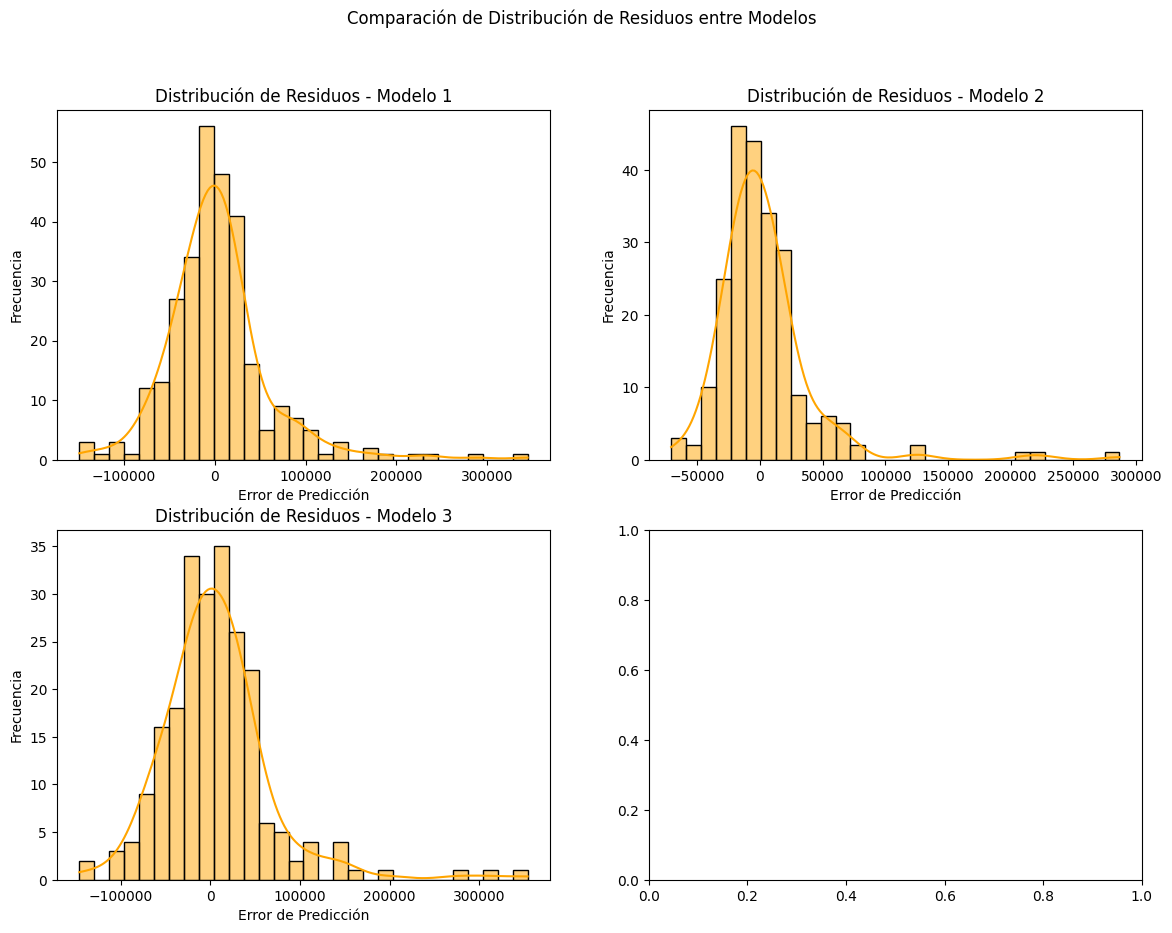

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos simulados de residuos (basados en las distribuciones observadas)
residuals_model_1 = residuos1
residuals_model_2 = residuos2
residuals_model_3 = residuos3

# Lista de datos y nombres
residuals = [residuals_model_1, residuals_model_2, residuals_model_3]
model_names = ["Modelo 1", "Modelo 2", "Modelo 3"]

# Crear una comparación visual de los residuos entre modelos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Comparación de Distribución de Residuos entre Modelos")

# Generar histogramas de residuos para cada modelo
for i, ax in enumerate(axes.flat):
    sns.histplot(residuals[i], bins=30, kde=True, ax=ax, color='orange')
    ax.set_title(f"Distribución de Residuos - {model_names[i]}")
    ax.set_xlabel("Error de Predicción")
    ax.set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
